### 학습 목표
1. Decision Tree를 통해서 버섯 분류 실습을 진행한다.
2. 문자 데이터를 숫자 데이터로 바꾸주는 기법에 대해 학습한다.
3. 정답과 관련이 깊은 특성을 확인하는 방법에 대해 학습한다.
4. 교차 검증 기법에 대해 알아본다.

In [1]:
from sklearn.tree import DecisionTreeClassifier 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 1. 데이터 불러오기
data = pd.read_csv('./data/mushroom.csv')



In [4]:
# 컬럼 요약 해제하는 방법

pd.set_option('display.max_columns', None)


In [5]:
# 2. 데이터 확인
# 결측치가 있는지, 데이터의 Dtype을 확인
# -> 결측치는 없다. 모든 데이터가 object다 -> 이대로는 모델을 학습할 수 없다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# iris에서 target이 0,1,2로 치환된 것은
# -> 라벨 인코딩

# 문제, 정답 데이터를 붙어야한다.
# axis = 1 : 열축을 삭제
# axis = 0 : 행축을 삭제

X = data.drop('poisonous', axis=1)
y = data['poisonous']

In [7]:
X['cap-shape'].unique

<bound method Series.unique of 0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object>

In [8]:
# One-Hot Encoding 사용
# -> 특정 값을 갖고 있다라는 내용을 내포

# Label Encoding
# -> 단순히 특정 값을 임의의 숫자로 치환
# -> 모델은 숫자의 대소를 구분하는데, 라벨 인코딩은 숫자자체에서 대소의 비교를 한다.
# 남자 : 0, 여자 : 1 -> 두 값들 사이에 우열이 필요가 없는데, 머신러닝 모델은 큰 숫자를 더 중요하게 여긴다.



X_one = pd.get_dummies(X)
X_one

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,Fals

In [9]:
# 문제점 :  문제 데이터 안에 있는 문자 데이터를 숫자로 바꿔야한다.
# 해결법 : 인코딩을 통해서 문자를 숫자로 치환

# 인코딩의 종류
# 1. label Encoding : 특정 문자를 원하는 숫자로 바꿔주는 기법
# 2. One-hot Encoding : 

In [10]:
# 추가설명 > 라벨 인코딩 하는 방법
X['habitat'].unique()

mapping = {'u' : 1, 'g' : 2, 'm': 3, 'd': 4, 'p': 5, 'w': 6, 'l': 7}

# map 함수를 통해서 mapping을 진행

X['habitat'].map(mapping)

0       1
1       2
2       3
3       1
4       2
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

In [11]:
# train_test_split 함수로 train 데이터, test 데이터로 분리
# X_one 과 y를 활용해서 7: 3 비율로 train , test 셋으로 분리 난수 : 42
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_one, y, test_size = 0.3, random_state=42)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 117)
(2438, 117)
(5686,)
(2438,)


In [13]:
# 모델링

# 1. 모델 객체 생성
from sklearn.tree import DecisionTreeClassifier
# 하이퍼파라미터 : 모델의 성능을 조정하면서, 일반화 성능을 최대로 끌어올리는 것이 목표
# 1. max_depth : 모델의 깊이를 제한(질문의 계층 )
# 2. min_samples_split : 노드를 분할하기 위해서 필요한 최소 데이터 수를 제한
# 3. min_samples_leaf : 노드가 최소로 가져야 할 최소 데이터 수를 제한. 분할 했을 때, 노드가 100개 미만의 데이터라면 분리를 제한
# 4. max_leaf_nodes :  분할하지 않는 리프 노드의 개수 자체를 제한

tree = DecisionTreeClassifier(max_depth=4) # 해당 트리는 질문을 4개 계층만 진행


# 2. 모델 학습

tree.fit(X_train,y_train)

# 3. 모델 예측 및 평가

tree.score(X_test,y_test)


0.9909762100082035

In [14]:
# graphviz 불러오기

import graphviz

In [15]:
# Decision Tree 모델을 시각화
# 1. 하이퍼파라미터 설정을 하지 않은 Tree모델을 시각화
# 2. 하이퍼파라미터 설정을 한 Tree 모델을 시각화

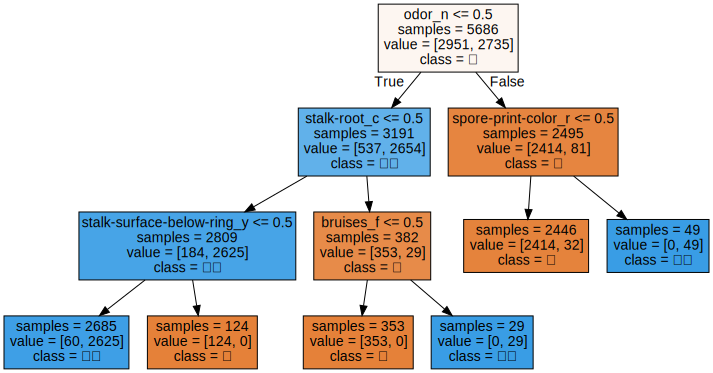

In [22]:
# 모델링
# 하이퍼파라미터 조정(사전-가지치기)를 통해서 과대적합을 제어할 수 있다.
# 1. 모델 객체 생성
tree1 = DecisionTreeClassifier(max_depth=3, max_leaf_nodes= 6)
# 2. 모델 학습
tree1.fit(X_train,y_train)

# 3. 모델 시각화
# Tree모델을 외부로 export하기
from sklearn.tree import export_graphviz

export_graphviz(tree1,out_file='tree1.dot', class_names=['독','식용'],feature_names= X_train.columns, impurity = False, filled = True)

with open('tree1.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [26]:
# 특성 선택
# -> 어떤 특성이 중요한 특성인가에 대해 알 수 있다.

tree1.feature_importances_
tree1.feature_names_in_

importance = pd.DataFrame(tree1.feature_importances_, columns=['특성중요도'], index= tree1.feature_names_in_)
# 정렬해주는 함수, sort_values

importance.sort_values(by= '특성중요도', ascending=False)

,특성중요도
odor_n,0.672918
stalk-root_c,0.186491
stalk-surface-below-ring_y,0.085230
spore-print-color_r,0.035201
bruises_f,0.020161
...,...
gill-size_n,0.000000
gill-size_b,0.000000
gill-spacing_w,0.000000
gill-spacing_c,0.000000


In [27]:
# 에측이 목적이 아니라, 특성 중요도 파악이 중점이라면
# 사전가지치기는 효과적이지 않다.

tree2 = DecisionTreeClassifier()

tree2.fit(X_train,y_train)

importance = pd.DataFrame(tree2.feature_importances_, columns=['특성중요도'], index= tree2.feature_names_in_)
# 정렬해주는 함수, sort_values

importance.sort_values(by= '특성중요도', ascending=False)

,특성중요도
odor_n,0.630137
stalk-root_c,0.174635
stalk-surface-below-ring_y,0.093039
spore-print-color_r,0.032963
odor_a,0.021118
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000


In [ ]:
# 특성중요도를 통해서 알 수 있었던 것
# 해당 데이터에서 oder(냄새) 데이터가 독버섯과 식용버섯을 가늠하는데 중요한 역할을 하고 있다.
# stalk-root(자루테 뿌리) 데이터도 어느정도 영향을 미치고 있다.
# 그 외의 데이터들은 큰 영향을 미치지 않아서 odor와 stalk-root 컬럼을 제외하고 추가적인 분석이 필요하다.